In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/pretraining-effect.csv')
df

,Name,pretrainingBatchSize,bleu
0,fast-jazz-25,50,0.219146
1,warm-sponge-27,500,0.216172
2,swift-rain-18,100,0.214580
3,avid-star-26,250,0.213094
4,hopeful-oath-28,750,0.209779
5,misty-dawn-29,1000,0.208405
6,rose-forest-24,25,0.205355


In [3]:
arr = df.to_numpy()[:,1:]
arr

array([[50, 0.2191456251548992],
       [500, 0.2161720323758605],
       [100, 0.2145797644288093],
       [250, 0.2130936478672993],
       [750, 0.2097793088744685],
       [1000, 0.2084047032616047],
       [25, 0.2053550250095613]], dtype=object)

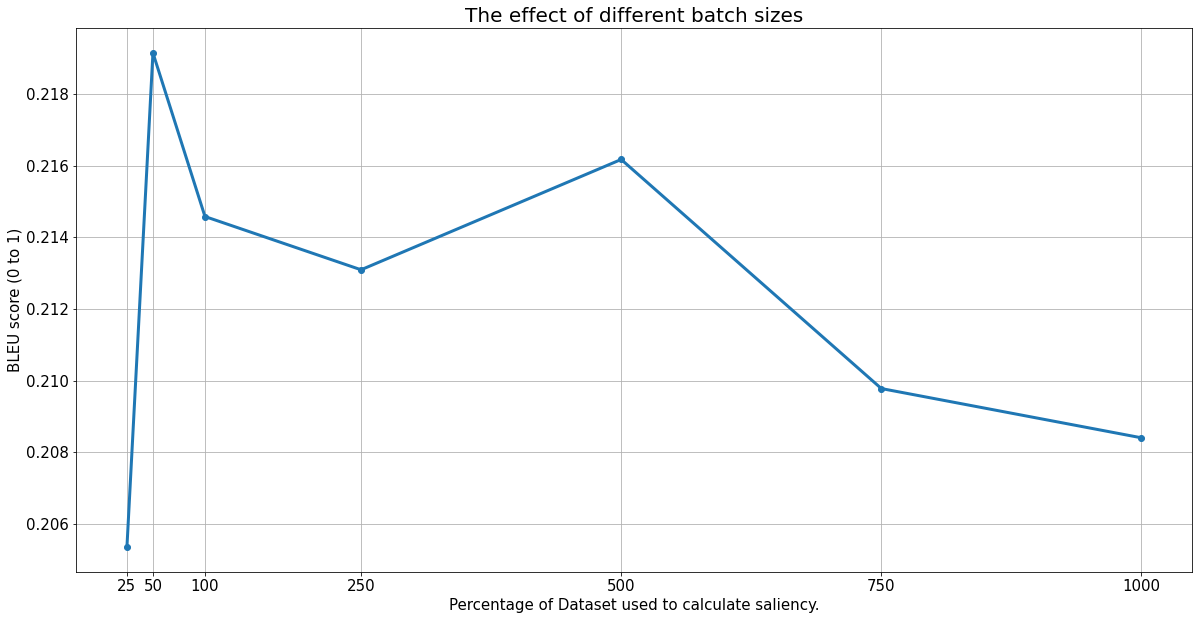

In [4]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']
# for i,j,m in zip(types,final,markers):
index = np.argsort(arr[:,0])
plt.plot(arr[index,0],arr[index,1],marker='o',linewidth=3)

# plt.legend(prop={'size': 20})
plt.xticks([25,50,100,250,500,750,1000])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage of Dataset used to calculate saliency.',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of different batch sizes', fontsize=20)
ax.grid()
# plt.savefig('The effect of different batch sizes.png')
plt.show()

In [41]:
df = pd.read_csv('./data/obd-with-retrain.csv')
df

,Name,percentage,pre_bleu,post_bleu
0,soft-lion-10,0.500,0.274511,0.277820
1,clear-disco-8,0.600,0.266813,0.276138
2,expert-serenity-6,0.700,0.249429,0.274117
3,proud-glade-4,0.800,0.218177,0.267775
4,sage-sun-1,0.900,0.156042,0.253656
5,robust-frost-11,0.910,0.142467,0.252971
6,helpful-totem-9,0.930,0.112445,0.243625
7,drawn-microwave-7,0.950,0.056114,0.221748
8,dutiful-fog-5,0.970,0.005079,0.187372
9,effortless-armadillo-2,0.990,0.003600,0.110856


In [42]:
arr = df.to_numpy()[:,1:]
arr

array([[0.5, 0.2745105945632104, 0.2778202099732292],
       [0.6, 0.2668132365325574, 0.2761382321764516],
       [0.7, 0.2494292049422878, 0.2741170149920088],
       [0.8, 0.2181771080438117, 0.2677751526068661],
       [0.9, 0.1560417532382744, 0.2536557623961782],
       [0.91, 0.1424669520519882, 0.2529711727736041],
       [0.93, 0.112445029686726, 0.2436245503328861],
       [0.95, 0.0561143900005026, 0.2217475231801159],
       [0.97, 0.0050790167575088, 0.1873721683460481],
       [0.99, 0.0036004411766448, 0.1108564783436172],
       [0.995, 0.0575375048250054, 0.0732717770961164]], dtype=object)

In [43]:
arr[-1,1] = 0
arr[0]

array([0.5, 0.2745105945632104, 0.2778202099732292], dtype=object)

[[0.5 0.2745105945632104 0.2778202099732292]
 [0.6 0.2668132365325574 0.2761382321764516]
 [0.7 0.2494292049422878 0.2741170149920088]
 [0.8 0.2181771080438117 0.2677751526068661]
 [0.9 0.1560417532382744 0.2536557623961782]
 [0.91 0.1424669520519882 0.2529711727736041]
 [0.93 0.112445029686726 0.2436245503328861]
 [0.95 0.0561143900005026 0.2217475231801159]
 [0.97 0.0050790167575088 0.1873721683460481]
 [0.99 0.0036004411766448 0.1108564783436172]
 [0.995 0 0.0732717770961164]]


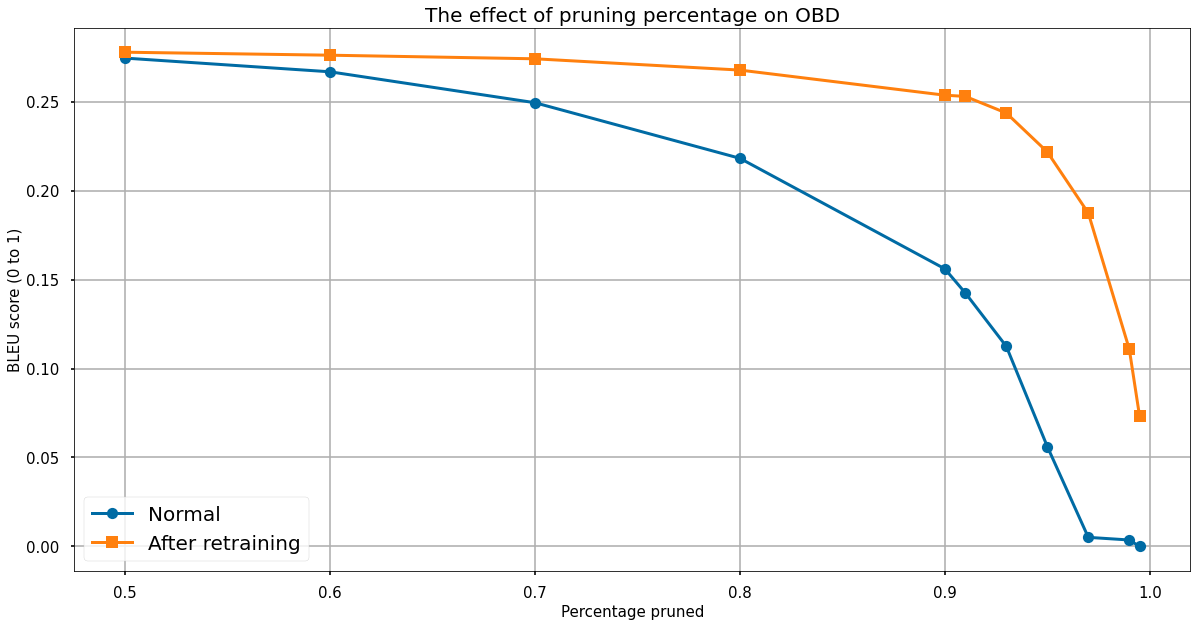

In [45]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']
# ax.set_xscale('log')
for i,j,name in zip(range(1,3),markers,['Normal','After retraining']):
# index = np.argsort(arr[:,0])
    plt.plot((arr[:,0].astype('float')),arr[:,i],marker=j,label=name,linewidth=3)
print(arr)
plt.legend(prop={'size': 20})
# plt.xticks(list(arr[:,0]))


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage pruned',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of pruning percentage on OBD', fontsize=20)
ax.grid()
# plt.savefig('The effect of pruning percentage on OBD.png')
plt.show()

In [46]:
new_arr = arr[4:,:]

In [47]:
obd_extreme = arr[4:,:]

[[0.5 0.2745105945632104 0.2778202099732292]
 [0.6 0.2668132365325574 0.2761382321764516]
 [0.7 0.2494292049422878 0.2741170149920088]
 [0.8 0.2181771080438117 0.2677751526068661]
 [0.9 0.1560417532382744 0.2536557623961782]
 [0.91 0.1424669520519882 0.2529711727736041]
 [0.93 0.112445029686726 0.2436245503328861]
 [0.95 0.0561143900005026 0.2217475231801159]
 [0.97 0.0050790167575088 0.1873721683460481]
 [0.99 0.0036004411766448 0.1108564783436172]
 [0.995 0 0.0732717770961164]]


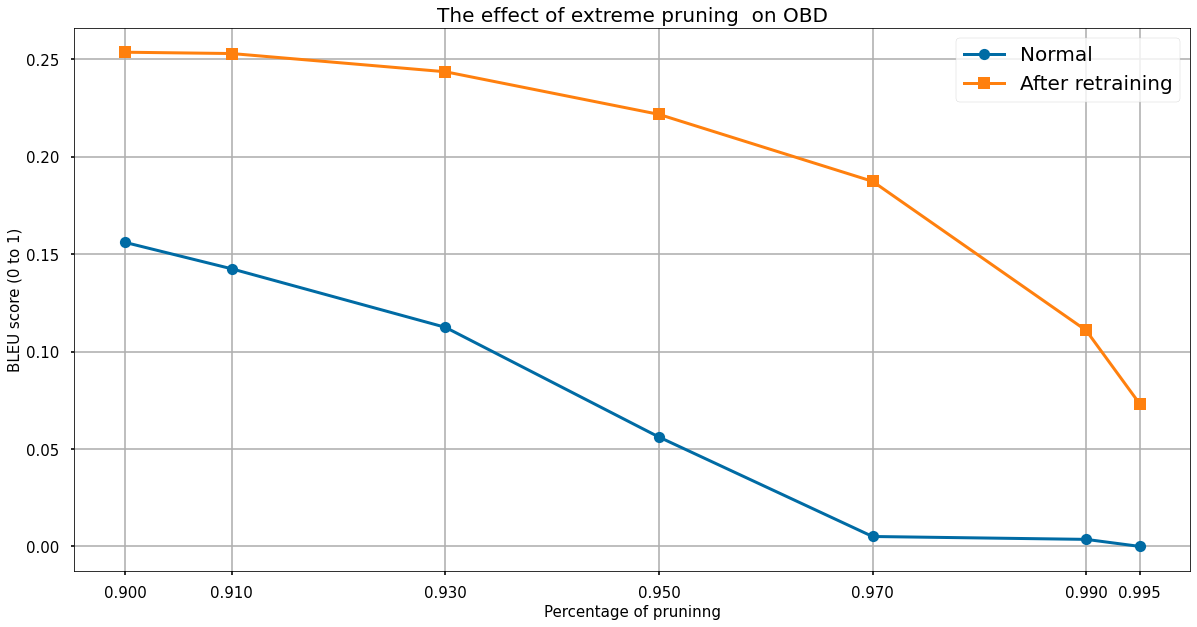

In [49]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']
# ax.set_xscale('log')
for i,j,name in zip(range(1,3),markers,['Normal','After retraining']):
    # index = np.argsort(arr[:,0])
    plt.plot((new_arr[:,0].astype('float')),new_arr[:,i],marker=j,label=name,linewidth=3)
print(arr)
plt.legend(prop={'size': 20})
plt.xticks(list(new_arr[:,0]))


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage of pruninng',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of extreme pruning  on OBD', fontsize=20)
ax.grid()
plt.savefig('The effect of extreme pruning  on OBD.png')
plt.show()

## Percentage pruned (bar)

In [12]:
df = pd.read_csv('./data/percent-pruned.csv')
df

,Name,classN,percentage,pruning_type,percentage-pruned
0,happy-dew-120,att_vec_linear,[0.8],class-blind,76.229858
1,eternal-snowball-119,att_src_linear,[0.8],class-blind,85.766602
2,whole-frog-118,pred,[0.8],class-blind,82.615853
3,rare-surf-117,decoder_lstm,[0.8],class-blind,75.070389
4,treasured-totem-116,decoder_cell_init,[0.8],class-blind,77.830318
...,...,...,...,...,...
99,soft-bush-7,decoder_lstm,90,NaN,52.499366
100,valiant-energy-6,decoder_cell_init,90,NaN,38.411458
101,vocal-pine-5,encoder_lstm,90,NaN,51.689510
102,earnest-resonance-4,tgt_embed,90,NaN,97.206990


In [13]:
arr = df.to_numpy()[:,1:]
new_arr = arr[arr[:,1] != '90',:]
for i in range(new_arr.shape[0]):
    name = new_arr[i,1][0] 
    if name == '[':
        new_arr[i,1] = float(new_arr[i,1][1:-1])
    else:
        new_arr[i,1] = float(new_arr[i,1])

for i in range(new_arr.shape[0]):
    name = new_arr[i,2]
    if type(name) !=  str:
        new_arr[i,2] = 'snip'


In [14]:
new_arr

array([['att_vec_linear', 0.8, 'class-blind', 76.2298583984375],
       ['att_src_linear', 0.8, 'class-blind', 85.7666015625],
       ['pred', 0.8, 'class-blind', 82.61585255651946],
       ['decoder_lstm', 0.8, 'class-blind', 75.07038859577922],
       ['decoder_cell_init', 0.8, 'class-blind', 77.83031798245614],
       ['encoder_lstm', 0.8, 'class-blind', 71.77382888497081],
       ['tgt_embed', 0.8, 'class-blind', 80.05156304766912],
       ['src_embed', 0.8, 'class-blind', 79.66211810002811],
       ['att_vec_linear', 0.7, 'class-blind', 66.92911783854166],
       ['att_src_linear', 0.7, 'class-blind', 77.02713012695312],
       ['att_vec_linear', 0.8, 'obd', 8.2977294921875],
       ['pred', 0.7, 'class-blind', 72.95828951980371],
       ['att_src_linear', 0.8, 'obd', 12.99591064453125],
       ['decoder_lstm', 0.7, 'class-blind', 66.3168374594156],
       ['pred', 0.8, 'obd', 83.44510917783911],
       ['decoder_cell_init', 0.7, 'class-blind', 68.14083820662769],
       ['decoder

In [15]:
arr= new_arr

In [16]:
x_axis = np.arange(8)*1.5
bar_width = 0.3

In [17]:
blind_high = np.where((arr[:,1] == 0.8) & (arr[:,2] == 'class-blind'))
blind_low = np.where((arr[:,1] == 0.5) & (arr[:,2] == 'class-blind'))

obd_high = np.where((arr[:,1] == 0.8) & (arr[:,2] == 'obd'))
obd_low= np.where((arr[:,1] == 0.5 )& (arr[:,2] == 'obd'))

snip_high = np.where((arr[:,1] == 0.8) & (arr[:,2] == 'snip'))
snip_low = np.where((arr[:,1] == 0.5) & (arr[:,2] == 'snip'))

In [18]:
arr[blind_low,0],arr[obd_low,0],arr[snip_low,0]

(array([['att_vec_linear', 'att_src_linear', 'pred', 'decoder_lstm',
         'decoder_cell_init', 'encoder_lstm', 'tgt_embed', 'src_embed']],
       dtype=object),
 array([['att_vec_linear', 'att_src_linear', 'pred', 'decoder_lstm',
         'decoder_cell_init', 'encoder_lstm', 'tgt_embed', 'src_embed']],
       dtype=object),
 array([['att_vec_linear', 'att_src_linear', 'pred', 'decoder_lstm',
         'decoder_cell_init', 'encoder_lstm', 'tgt_embed', 'src_embed']],
       dtype=object))

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [23]:
plt.style.use('tableau-colorblind10')

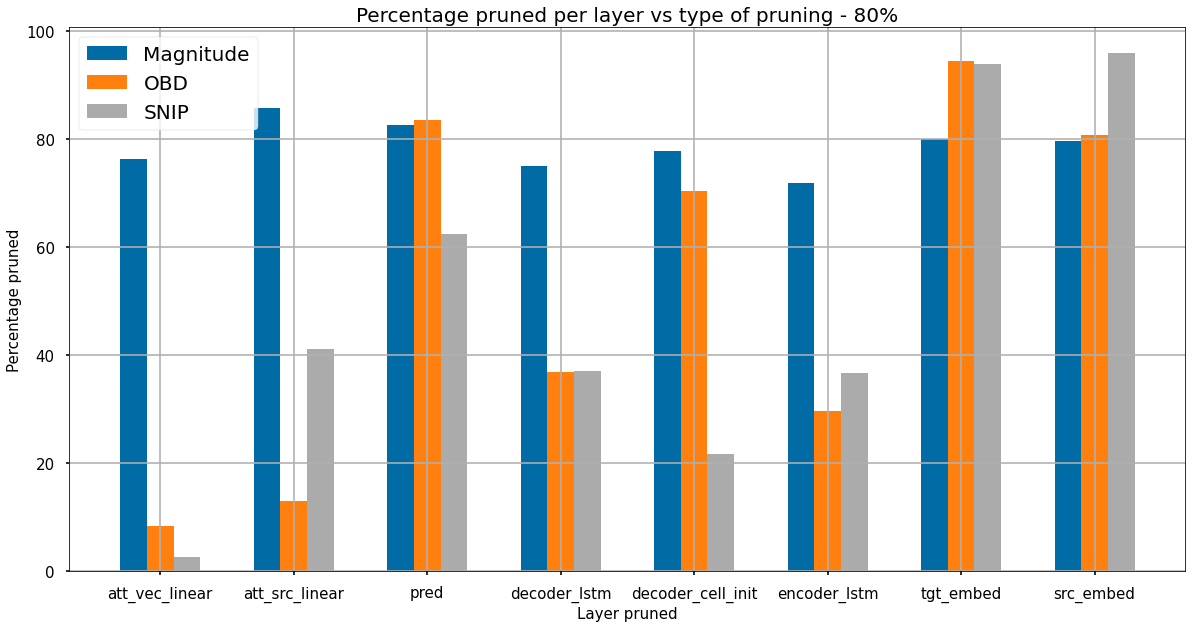

In [24]:
_,ax=plt.subplots(1, figsize=(20,10))
types =['Magnitude', 'OBD','SNIP']
# for 
ax.bar(x_axis-bar_width, arr[blind_high,3].reshape(-1).astype('float'), bar_width,label=types[0])
ax.bar(x_axis, arr[obd_high,3].reshape(-1).astype('float'), bar_width,label=types[1])
ax.bar(x_axis+bar_width, arr[snip_high,3].reshape(-1).astype('float'), bar_width,label=types[2])

ax.set_xticks(x_axis)
ax.set_xticklabels(arr[blind_high,0].reshape(-1))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Layer pruned',fontsize=15)
ax.set_ylabel('Percentage pruned',fontsize=15)
ax.grid()
ax.set_title('Percentage pruned per layer vs type of pruning - 80%', fontsize=20)
plt.legend(loc=2,prop={'size': 20})
# plt.savefig('Percentage pruned vs type of pruning-80.png')
plt.show()

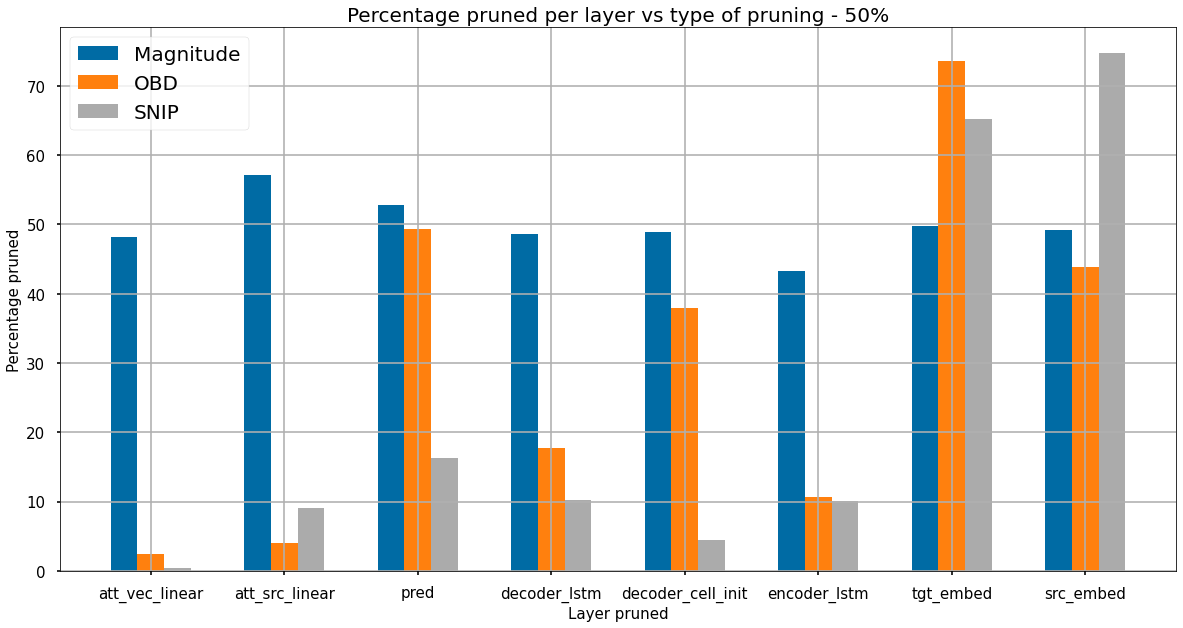

In [25]:
_,ax=plt.subplots(1, figsize=(20,10))
types =['Magnitude', 'OBD','SNIP']
# for 
ax.bar(x_axis-bar_width, arr[blind_low,3].reshape(-1).astype('float'), bar_width,label=types[0])
ax.bar(x_axis, arr[obd_low,3].reshape(-1).astype('float'), bar_width,label=types[1])
ax.bar(x_axis+bar_width, arr[snip_low,3].reshape(-1).astype('float'), bar_width,label=types[2])

ax.set_xticks(x_axis)
ax.set_xticklabels(arr[blind_low,0].reshape(-1))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Layer pruned',fontsize=15)
ax.set_ylabel('Percentage pruned',fontsize=15)
ax.grid()
ax.set_title('Percentage pruned per layer vs type of pruning - 50%', fontsize=20)
plt.legend(loc=2,prop={'size': 20})
# plt.savefig('Percentage pruned vs type of pruning-50.png')
plt.show()

## Extreme overall comparision:

In [26]:
df = pd.read_csv('./data/extreme-2.csv')
df

,Name,percentage,pruningType,pre_bleu,post_bleu
0,still-rain-11,0.995,class-blind,0.131526,0.003945
1,chocolate-monkey-1,0.910,class-blind,0.000081,0.251321
2,graceful-dew-5,0.950,class-blind,0.000632,0.207389
3,prime-brook-7,0.970,class-blind,0.179580,0.130633
4,ruby-aardvark-9,0.990,class-blind,0.004672,0.024016
5,morning-dragon-3,0.930,class-blind,0.001562,0.238007
6,curious-cosmos-2,0.910,random,0.323230,0.171614
7,earthy-vortex-10,0.990,random,0.056748,0.021978
8,still-sun-12,0.995,random,0.041489,0.003789
9,pretty-water-4,0.930,random,0.269619,0.133791


In [27]:
arr = df.to_numpy()[:,1:]
arr

array([[0.995, 'class-blind', 0.1315260868286965, 0.0039448549728686],
       [0.91, 'class-blind', 8.14475199982e-05, 0.25132126379885],
       [0.95, 'class-blind', 0.0006315224389026, 0.2073892439897278],
       [0.97, 'class-blind', 0.1795801520023696, 0.130632564621463],
       [0.99, 'class-blind', 0.0046724959101742, 0.0240158680174481],
       [0.93, 'class-blind', 0.0015621352261107, 0.2380065674626136],
       [0.91, 'random', 0.3232298503060197, 0.1716135165126633],
       [0.99, 'random', 0.0567477395461497, 0.0219784976564848],
       [0.995, 'random', 0.0414888651525652, 0.0037893903856607],
       [0.93, 'random', 0.2696185905908219, 0.1337906393069486],
       [0.97, 'random', 0.049338853632819, 0.0449080929781546],
       [0.95, 'random', 0.0006315224389026, 0.0842927210227489]],
      dtype=object)

In [28]:
arr[arr[:,2] > 0.01,2] = 0

In [29]:
arr
# type(arr[1,2])

array([[0.995, 'class-blind', 0, 0.0039448549728686],
       [0.91, 'class-blind', 8.14475199982e-05, 0.25132126379885],
       [0.95, 'class-blind', 0.0006315224389026, 0.2073892439897278],
       [0.97, 'class-blind', 0, 0.130632564621463],
       [0.99, 'class-blind', 0.0046724959101742, 0.0240158680174481],
       [0.93, 'class-blind', 0.0015621352261107, 0.2380065674626136],
       [0.91, 'random', 0, 0.1716135165126633],
       [0.99, 'random', 0, 0.0219784976564848],
       [0.995, 'random', 0, 0.0037893903856607],
       [0.93, 'random', 0, 0.1337906393069486],
       [0.97, 'random', 0, 0.0449080929781546],
       [0.95, 'random', 0.0006315224389026, 0.0842927210227489]],
      dtype=object)

In [30]:
blind = arr[arr[:,1] == 'class-blind'][:,[0,2,3]]
random_arr  = arr[arr[:,1] == 'random'][:,[0,2,3]]

In [31]:
obd_extreme

array([[0.9, 0.1560417532382744, 0.2536557623961782],
       [0.91, 0.1424669520519882, 0.2529711727736041],
       [0.93, 0.112445029686726, 0.2436245503328861],
       [0.95, 0.0561143900005026, 0.2217475231801159],
       [0.97, 0.0050790167575088, 0.1873721683460481],
       [0.99, 0.0036004411766448, 0.1108564783436172],
       [0.995, 0, 0.0732717770961164]], dtype=object)

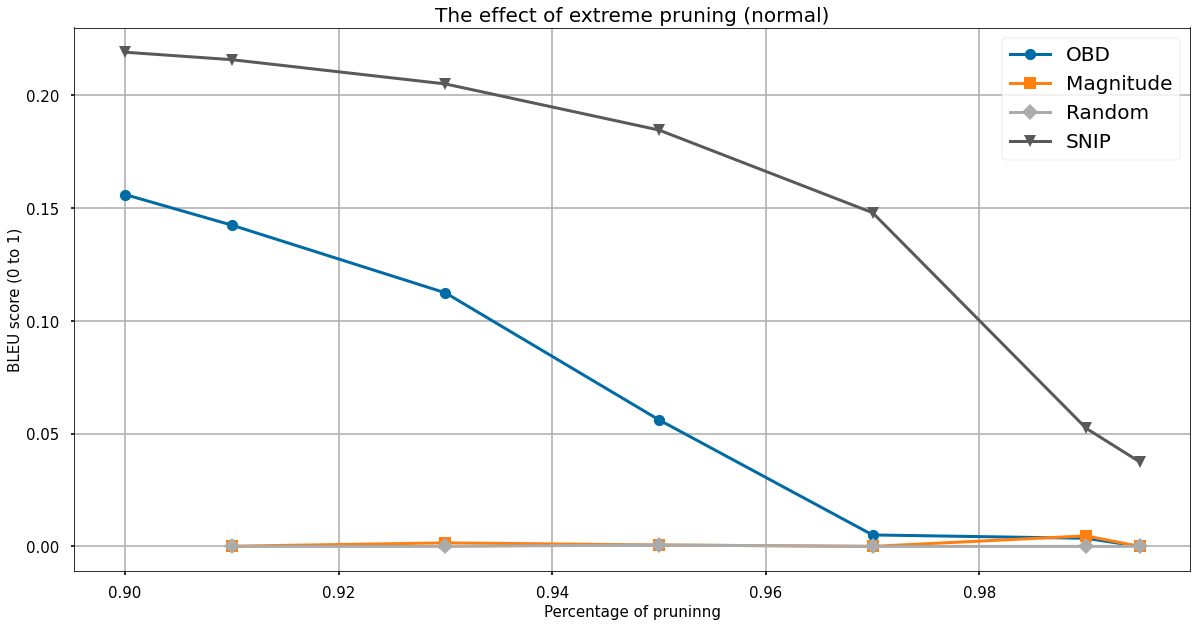

In [39]:
_,ax=plt.subplots(1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']

numbers = [obd_extreme, blind, random_arr,snip_arr]

for i,j,name,array in zip(range(0,3),markers,['OBD','Magnitude','Random','SNIP'],numbers):
    index = np.argsort(array[:,0])
    plt.plot(array[index,0],array[index,1],marker=j,label=name,linewidth=3)
    
plt.plot(snip_arr[4:,0],snip_arr[4:,1],marker='v',label='SNIP',linewidth=3)
# print(arr)
plt.legend(prop={'size': 20})
# plt.xticks(list(new_arr[:,0]))


ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage of pruninng',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of extreme pruning (normal)', fontsize=20)
ax.grid()
plt.savefig('The effect of extreme pruning (normal).png')
plt.show()

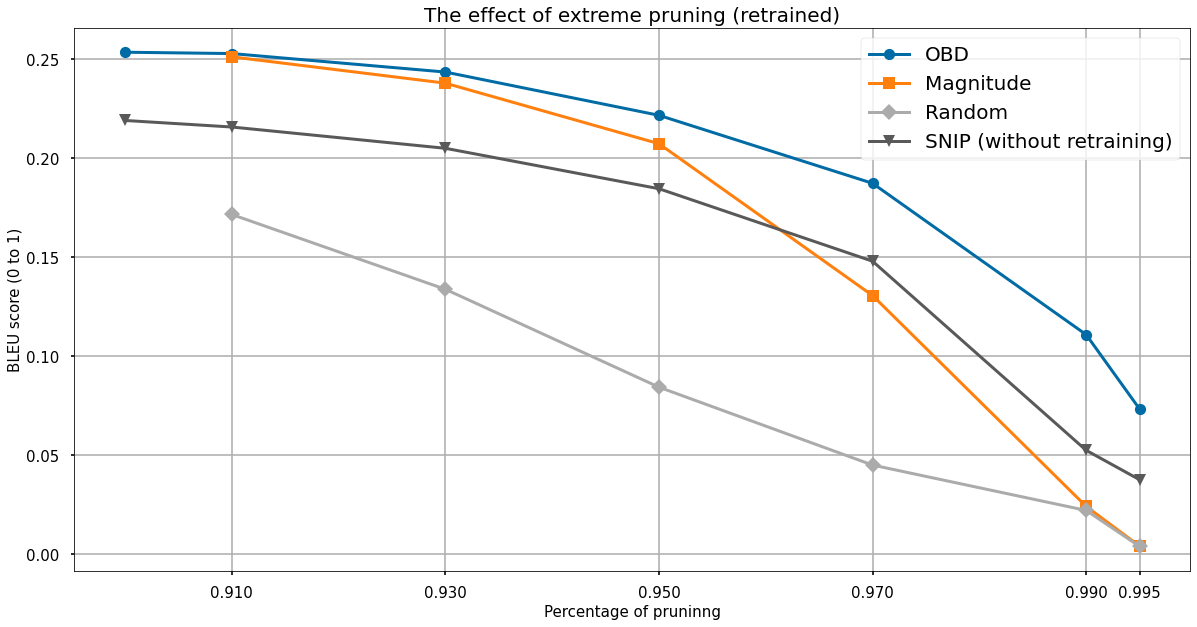

In [58]:
_,ax=plt.subplots(1,1, figsize=(20,10))
markers = ['o', 's', 'D', 'v']

numbers = [obd_extreme, blind, random_arr]

for i,j,name,array in zip(range(0,3),markers,['OBD','Magnitude','Random'],numbers):
    index = np.argsort(array[:,0])
    plt.plot(array[index,0],array[index,2],marker=j,label=name,linewidth=3)
# print(arr)
plt.plot(snip_arr[4:,0],snip_arr[4:,1],marker='v',label='SNIP (without retraining)',linewidth=3)
plt.legend(prop={'size': 20})
plt.xticks(list(array[index,0]))

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage of pruninng',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title('The effect of extreme pruning (retrained)', fontsize=20,alpha=1)
plt.grid()
# plt.show()
plt.savefig('The effect of extreme pruning (retrained).png')


In [34]:
df = pd.read_csv('./data/actual-snip.csv')
df

,Name,percentage,bleu
0,lively-disco-11,0.500,0.221007
1,firm-sound-9,0.600,0.226898
2,confused-wave-7,0.700,0.224860
3,laced-jazz-5,0.800,0.226980
4,splendid-dust-3,0.900,0.219146
5,ancient-durian-4,0.910,0.215836
6,smooth-pyramid-6,0.930,0.205075
7,prime-blaze-8,0.950,0.184633
8,solar-microwave-10,0.970,0.147983
9,legendary-oath-12,0.990,0.052376


In [35]:
snip_arr = df.to_numpy()[:,1:]
snip_arr

array([[0.5, 0.2210074429610451],
       [0.6, 0.2268975709027224],
       [0.7, 0.2248604135462998],
       [0.8, 0.2269799594703193],
       [0.9, 0.2191456251548992],
       [0.91, 0.2158362628485931],
       [0.93, 0.2050746892716078],
       [0.95, 0.184633324766034],
       [0.97, 0.1479829642261419],
       [0.99, 0.05237606593169],
       [0.995, 0.0375153798893557]], dtype=object)